In [1]:
from biolearn.load import load_nhanes 
year = 2010
df = load_nhanes(year)
df["years_until_death"] = df["months_until_death"] / 12


In [2]:
from biolearn.hematology import phenotypic_age
df["phenotypic_age"]=phenotypic_age(df)

<Axes: xlabel='age', ylabel='phenotypic_age'>

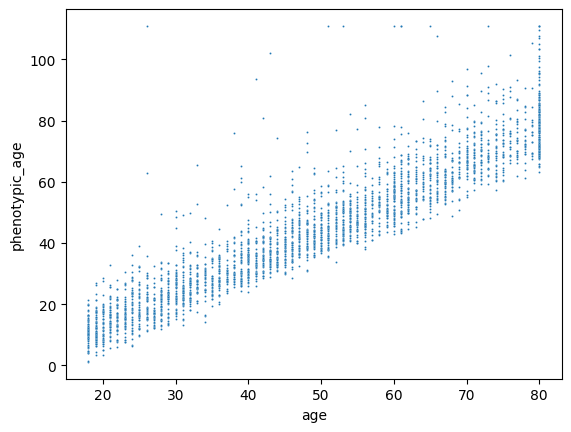

In [11]:
import seaborn as sn
sn.scatterplot(data=df,x="age", y="phenotypic_age",s=2)

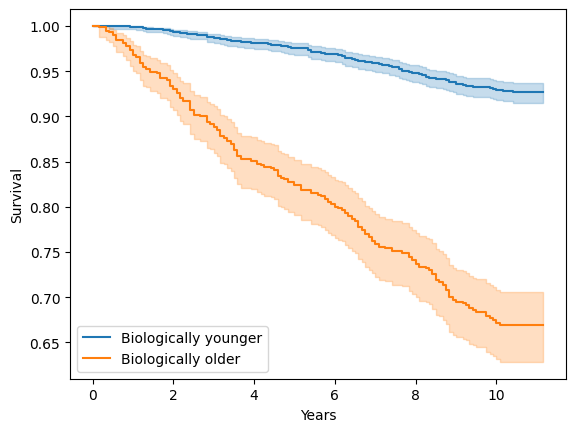

In [12]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
df["biologically_older"] = df["phenotypic_age"] > df["age"]
ax = plt.subplot()
groups = df["biologically_older"]
ix = groups == 0
T = df.years_until_death
E = df.is_dead
kmf = KaplanMeierFitter()
kmf.fit(T[ix], E[ix], label="Biologically younger")
ax = kmf.plot_survival_function(ax=ax)
kmf.fit(T[~ix], E[~ix], label="Biologically older")
ax = kmf.plot_survival_function()
plt.ylabel("Survival")
plt.xlabel("Years");

In [1]:
from biolearn.load import load_dnam
#GSE41169 blood DNAm data
url='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41169/matrix/GSE41169_series_matrix.txt.gz'
df=load_dnam(dnam_file=url,id_row=32,age_row=46,skiprows=72)

In [2]:
from biolearn.clock import horvath_clock, hannum_clock, phenoage_clock
df['horvath'] = horvath_clock(df)
df['hannum'] = hannum_clock(df)
df['phenoage'] = phenoage_clock(df)

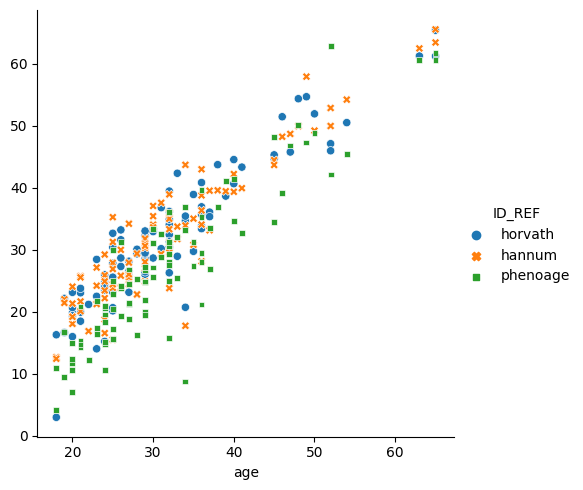

In [4]:
import seaborn as sn
df.index=df['age']
sn.relplot(data=df[['horvath','hannum','phenoage']], kind="scatter");